In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('./birtamode_house_prices_60k.csv')
df.head()

,area_sqft,num_rooms,num_floors,age,near_main_road,has_parking,price
0,1260,2,3,28,1,1,1.003322e+06
1,1694,1,1,24,0,1,8.574810e+05
2,1530,4,1,19,0,1,1.342674e+06
3,1495,3,2,29,1,1,1.127786e+06
4,2038,7,3,41,1,1,2.709394e+06


In [5]:
df['price_crore_npr'] = (df["price"] / 1e7).round(2)
df.head()

,area_sqft,num_rooms,num_floors,age,near_main_road,has_parking,price,price_crore_npr
0,1260,2,3,28,1,1,1.003322e+06,0.10
1,1694,1,1,24,0,1,8.574810e+05,0.09
2,1530,4,1,19,0,1,1.342674e+06,0.13
3,1495,3,2,29,1,1,1.127786e+06,0.11
4,2038,7,3,41,1,1,2.709394e+06,0.27


In [6]:
df.drop(columns=['price'], inplace=True)

In [7]:
df.head()

,area_sqft,num_rooms,num_floors,age,near_main_road,has_parking,price_crore_npr
0,1260,2,3,28,1,1,0.10
1,1694,1,1,24,0,1,0.09
2,1530,4,1,19,0,1,0.13
3,1495,3,2,29,1,1,0.11
4,2038,7,3,41,1,1,0.27


In [11]:
X= df.drop(columns=['price_crore_npr'])
y = df['price_crore_npr']

C:\Users\Acer\AppData\Local\Temp\ipykernel_16836\2795345102.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\Acer\AppData\Local\Temp\ipykernel_16836\2795345102.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\Acer\AppData\Local\Temp\ipykernel_16836\2795345102.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\Acer\AppData\Local\Temp\ipykernel_16836\2795345102.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.l

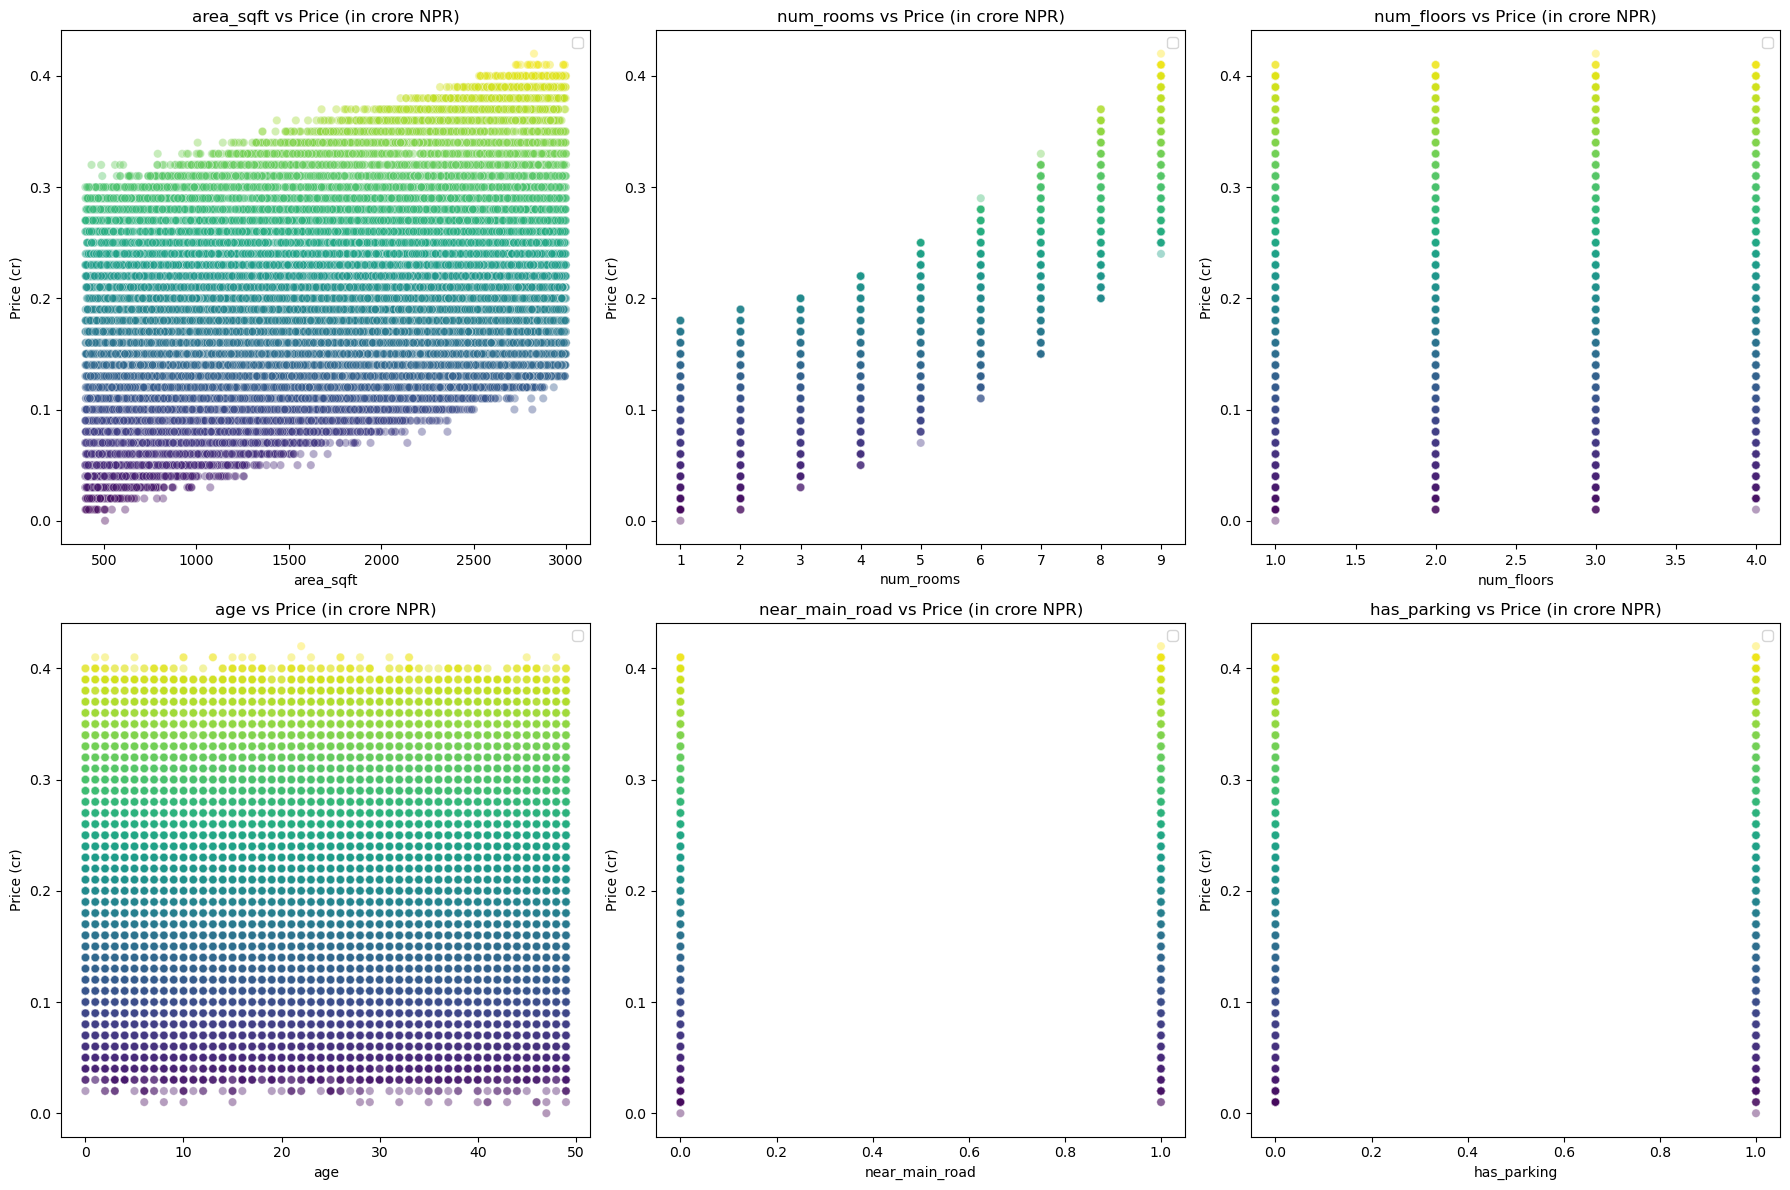

In [14]:

features = ['area_sqft', 'num_rooms', 'num_floors', 'age', 'near_main_road', 'has_parking']

# Plot each feature vs target using a for loop
plt.figure(figsize=(18, 12))

for i, feature in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(x=X[feature], y=y, alpha=0.4, c=y)
    plt.title(f"{feature} vs Price (in crore NPR)")
    plt.xlabel(feature)
    plt.legend()
    plt.ylabel("Price (cr)")
    
plt.tight_layout()
plt.show()

In [15]:
from datetime import datetime
from typing import List


class Entry:
    def __init__(self, date: str, mood: int, energy_level: int):
        self.date = self.validate_date(date)
        self.mood = self.validate_scale(mood, "Mood")
        self.energy_level = self.validate_scale(energy_level, "Energy Level")

    def validate_date(self, date_str):
        try:
            datetime.strptime(date_str, "%Y-%m-%d")
            return date_str
        except ValueError:
            raise ValueError("Date must be in format YYYY-MM-DD")

    def validate_scale(self, value, label):
        if not (1 <= value <= 10):
            raise ValueError(f"{label} must be between 1 and 10")
        return value

    def display_summary(self):
        print(f"Date: {self.date} | Mood: {self.mood} | Energy: {self.energy_level}")


In [ ]:

class WellnessEntry(Entry):
    def __init__(self, date, mood, energy_level, stress_level, physical_activity_minutes, symptoms: List[str]):
        super().__init__(date, mood, energy_level)
        self.stress_level = self.validate_scale(stress_level, "Stress Level")
        self.physical_activity_minutes = physical_activity_minutes
        self.symptoms = symptoms

    def display_summary(self):
        super().display_summary()
        print(f"Stress: {self.stress_level} | Activity: {self.physical_activity_minutes} mins")
        print(f"Symptoms: {', '.join(self.symptoms) if self.symptoms else 'None'}")

    def wellness_score(self):
        return (self.mood + self.energy_level - self.stress_level) + (self.physical_activity_minutes / 30)

    def add_symptom(self, symptom):
        if symptom not in self.symptoms:
            self.symptoms.append(symptom)

    def remove_symptom(self, symptom):
        if symptom in self.symptoms:
            self.symptoms.remove(symptom)

    def is_stressed(self):
        return self.stress_level > 7

    def activity_level_category(self):
        if self.physical_activity_minutes < 30:
            return "Low"
        elif self.physical_activity_minutes < 60:
            return "Moderate"
        else:
            return "High"

    def update_entry(self, attribute, value):
        if hasattr(self, attribute):
            setattr(self, attribute, value)
        else:
            raise AttributeError(f"{attribute} is not a valid field")

    def clear_symptoms(self):
        self.symptoms.clear()

    @staticmethod
    def average_mood(entries):
        moods = [e.mood for e in entries]
        return sum(moods) / len(moods) if moods else 0


class WellnessEntryWithNotes(WellnessEntry):
    def __init__(self, date, mood, energy_level, stress_level, physical_activity_minutes, symptoms, notes):
        super().__init__(date, mood, energy_level, stress_level, physical_activity_minutes, symptoms)
        self.notes = notes

    def display_summary(self, detailed=False):
        super().display_summary()
        if detailed:
            print(f"Notes: {self.notes}")

    def search_notes(self, keyword):
        return keyword.lower() in self.notes.lower()


In [ ]:
entries = []

def add_entry():
    try:
        date = input("Date (YYYY-MM-DD): ")
        mood = int(input("Mood (1-10): "))
        energy = int(input("Energy (1-10): "))
        stress = int(input("Stress (1-10): "))
        activity = int(input("Activity minutes: "))
        symptoms = input("Symptoms (comma-separated): ").split(",") if input("Symptoms? (y/n): ").lower() == 'y' else []
        notes = input("Notes: ")
        entry = WellnessEntryWithNotes(date, mood, energy, stress, activity, [s.strip() for s in symptoms], notes)
        entries.append(entry)
        print("Entry added successfully.\n")
    except Exception as e:
        print(f"Error: {e}")

def display_entries(detailed=True):
    if not entries:
        print("No entries to display.")
        return
    for i, entry in enumerate(entries):
        print(f"\n🔹 Entry #{i + 1}")
        entry.display_summary(detailed=detailed)

def search_by_date():
    date = input("Search date (YYYY-MM-DD): ")
    found = [e for e in entries if e.date == date]
    for e in found:
        e.display_summary(detailed=True)
    if not found:
        print("No entries found.")

def search_notes():
    keyword = input("Search keyword in notes: ")
    found = [e for e in entries if isinstance(e, WellnessEntryWithNotes) and e.search_notes(keyword)]
    for e in found:
        e.display_summary(detailed=True)
    if not found:
        print("No match found.")

def show_analysis():
    if not entries:
        print("No data for analysis.")
        return
    avg_mood = WellnessEntry.average_mood(entries)
    avg_stress = sum(e.stress_level for e in entries) / len(entries)
    avg_energy = sum(e.energy_level for e in entries) / len(entries)
    avg_activity = sum(e.physical_activity_minutes for e in entries) / len(entries)
    print("\n --- Wellness Analysis ---")
    print(f"Average Mood: {avg_mood:.2f}")
    print(f"Average Stress: {avg_stress:.2f}")
    print(f"Average Energy: {avg_energy:.2f}")
    print(f"Average Activity: {avg_activity:.2f} mins")


In [ ]:
def update_entry():
    display_entries(detailed=False)
    try:
        index = int(input("Enter entry number to update: ")) - 1
        if index not in range(len(entries)):
            print("Invalid entry.")
            return
        attr = input("Attribute to update (e.g., mood, energy_level): ")
        val = input("New value: ")
        entry = entries[index]

        # Convert types based on field
        if attr in ["mood", "energy_level", "stress_level", "physical_activity_minutes"]:
            val = int(val)
        elif attr == "symptoms":
            val = [s.strip() for s in val.split(",")]
        entry.update_entry(attr, val)
        print("Entry updated.")
    except Exception as e:
        print(f"error: {e}")

def delete_entry():
    display_entries(detailed=False)
    try:
        index = int(input("Enter entry number to delete: ")) - 1
        if index not in range(len(entries)):
            print("Invalid index.")
            return
        confirm = input("Are you sure? (y/n): ")
        if confirm.lower() == 'y':
            entries.pop(index)
            print("🗑️ Entry deleted.")
    except Exception as e:
        print(f"Errror: {e}")

def filter_entries():
    print("\n1. Mood > 7\n2. Stress > 7\n3. Activity > 30 mins")
    option = input("Choose filter: ")
    if option == '1':
        filtered = [e for e in entries if e.mood > 7]
    elif option == '2':
        filtered = [e for e in entries if e.stress_level > 7]
    elif option == '3':
        filtered = [e for e in entries if e.physical_activity_minutes > 30]
    else:
        print("Invalid option.")
        return

    for e in filtered:
        e.display_summary(detailed=True)

def sort_entries():
    print("\nSort by: 1. Date  2. Mood  3. Stress")
    option = input("Choose option: ")
    key_func = None
    if option == '1':
        key_func = lambda e: datetime.strptime(e.date, "%Y-%m-%d")
    elif option == '2':
        key_func = lambda e: e.mood
    elif option == '3':
        key_func = lambda e: e.stress_level
    else:
        print("Invalid option.")
        return

    sorted_list = sorted(entries, key=key_func)
    for e in sorted_list:
        e.display_summary(detailed=True)
